In [115]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [118]:
time_series = pd.read_csv("GoogleStocks.csv", parse_dates=True)
time_series = time_series.drop(time_series.index[0])

In [119]:
time_series['average'] = (time_series['high'] + time_series['low']) / 2
time_series = time_series.sort_values('date')
time_series.head()

,date,close,volume,open,high,low,average
754,2016/03/28,733.53,1300817.0,736.79,738.99,732.50,735.745
753,2016/03/29,744.77,1902254.0,734.59,747.25,728.76,738.005
752,2016/03/30,750.53,1782278.0,750.10,757.88,748.74,753.310
751,2016/03/31,744.95,1718638.0,749.25,750.85,740.94,745.895
750,2016/04/01,749.91,1576240.0,738.60,750.34,737.00,743.670


In [108]:
columns = list(time_series.columns.values)
del columns[0]

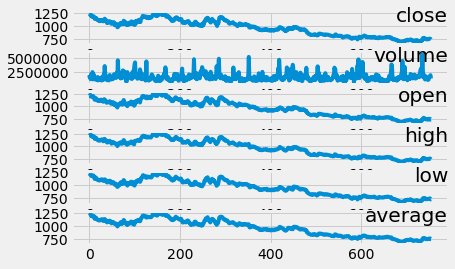

In [109]:
fig = plt.figure()
plt.style.use('fivethirtyeight')
for i, column in enumerate(columns):
    plt.subplot(len(columns), 1, i + 1)
    plt.plot(time_series.index, time_series[column])
    plt.title(column, y=0.5, loc='right')
plt.show()

In [121]:
time_series.isna().any()
data = time_series[['open', 'average', 'volume']]
# Feature Scaling Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(data)

In [122]:
def create_dataset(data, time_stamp):
    X_train = []
    y_train = []
    for i in range(time_stamp, len(data)):
        X_train.append(
            np.array([data[i - time_stamp:i, 1], data[i - time_stamp:i, 2]]).T)
        y_train.append(data[i, 0])
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    return X_train[:-100], y_train[-100], X_train[-100:], y_train[-100:]

In [123]:
def create_model(number_of_layer, number_of_cells, input_shape):
    model = Sequential()
    model.add(
        LSTM(
            units=number_of_cells,
            return_sequences=True,
            input_shape=input_shape))
    input_shape=None
    model.add(Dropout(0.2))
    for l in range(number_of_layer - 1):
        model.add(
            LSTM(
                units=number_of_cells,
                return_sequences=True))
        model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

In [124]:
def run_model(data, number_of_layer, number_of_cells, time_stamp):
    X_train, y_train, X_test, y_test = create_dataset(data, time_stamp)
    model = create_model(number_of_layer, number_of_cells, (time_stamp, 2))
    model.fit(X_train, y_train, epochs=50, batch_size=32)
    predicted_open_price = model.predict(X_test)
    print("Number of layer: {0}, Number of cells: {1}, time_stamp: {2}".format(
        number_of_cells, number_of_layer, time_stamp))
    print("Mean square error :", mean_squared_error(predicted_open_price, y_test))

In [125]:
run_model(training_set_scaled, 2, 30, 20)

TypeError: while_loop() got an unexpected keyword argument 'maximum_iterations'